Let's look at `(A outer product B)[0]`

In [1]:
from uarray import *
import operator

First, let's start with A and B as arrays we know nothing about:

In [24]:
A = Array(Variable("A"), Natural())
B = Array(Variable("A"), Natural())


By default, all we can do we can do with arrays is get their shape and index them, so we first turn them into MoA arrays, so we have access to those semantics.

Then we execute our operation:

In [25]:
def operation(a, b):
    a_moa = MoA.from_array(a)
    b_moa = MoA.from_array(b)
    idxs = MoA.from_array(Array.create_1d_infer(Natural(0)))
    return a_moa.outer_product_abstraction(operator.add, b_moa)[idxs]

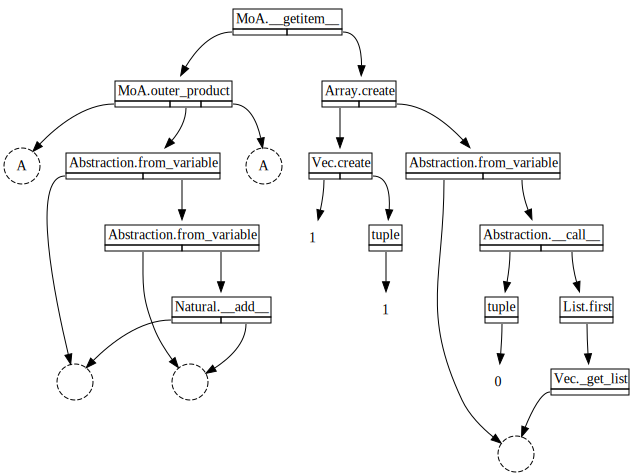

In [26]:
display_ops(replace(operation(A, B)))

We see that it doesn't expand the outer product, because we don't know if the arrays will be some concrete type for which we have an optimized outer product. However, if we re-run our operation with arrays that are not some other concrete type, we see the reductions are performed:

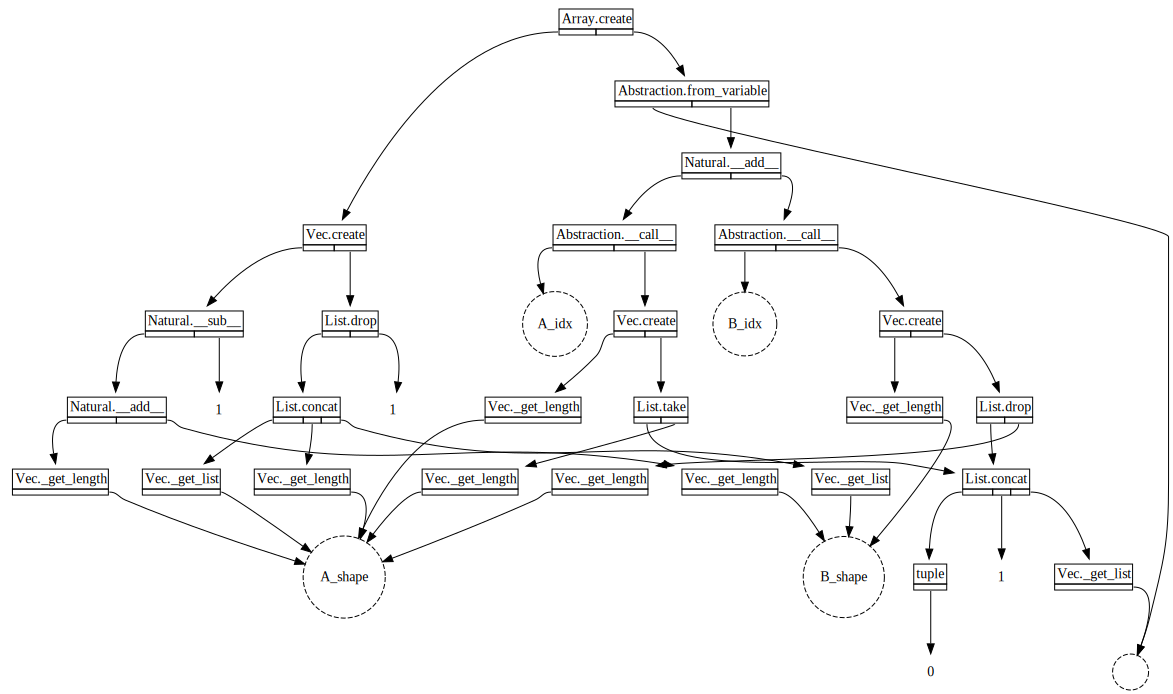

In [27]:
A = Array.create(
    Vec(Variable("A_shape"), Natural()),
    Abstraction(Variable("A_idx"), Natural())
)

B = Array.create(
    Vec(Variable("B_shape"), Natural()),
    Abstraction(Variable("B_idx"), Natural())
)


display_ops(replace(operation(A, B)))

Let's say we know each one is just a one dimensional vector with length $length$. We can also represent this:

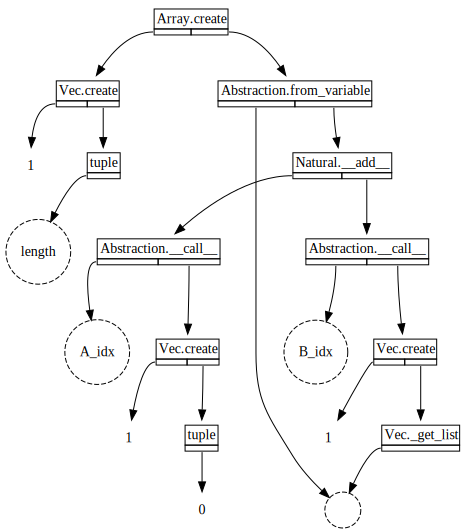

In [29]:
A = Array.create(
    Vec.create_infer(Natural(Variable("length"))),
    Abstraction(Variable("A_idx"), Natural())
)

B = Array.create(
    Vec.create_infer(Natural(Variable("length"))),
    Abstraction(Variable("B_idx"), Natural())
)


display_ops(replace(operation(A, B)))

Now, let's see if we index this with some index `i`, how this looks:

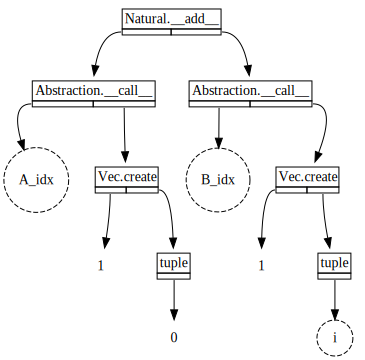

In [30]:
idxs = Vec.create_infer(Natural(Variable("i")))
display_ops(replace(operation(A, B).array[idxs]))

So this is equal to :

`A[0] + B[i]`